In [18]:
%matplotlib inline
import pandas as pd
import numpy as np
import random
from scipy import stats

import sys
import os

import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.mlab as mlab
import matplotlib as ml
import matplotlib.lines as lin
plt = ml.pyplot
ml.rcParams['figure.figsize'] = (10.0, 5.0)

#print(f"Python version: {sys.version}\n"
      #f"Pandas version: {pd.__version__}\n"
      #f"NumPy version: {np.__version__}\n"
      #f"Matplotlib version: {ml.__version__}\n")

rng = np.random.default_rng(42)  # initialise our random number generator

In [19]:
from IPython.core.magic import register_line_magic

@register_line_magic
def shorterr(line):
    """Show only the exception message if one is raised."""
    try:
        output = eval(line)
    except Exception as e:
        print("\x1b[31m\x1b[1m{e.__class__.__name__}: {e}\x1b[0m".format(e=e))
    else:
        return output
    
del shorterr

In [29]:

cwd=os.getcwd()
path_data=cwd+'/data/Supernova-chain-15000.txt'

data=np.genfromtxt(path_data)
df=pd.DataFrame(data)
df.columns=[ 'ones', 'zeros' ,r'$\Omega_m$', 'w', 'chi']
df=df.drop(['ones', 'zeros'], axis=1)
df

,$\Omega_m$,w,chi
0,0.309031,-1.003236,1038.979260
1,0.300323,-0.999047,1037.332047
2,0.290460,-1.005343,1035.635151
3,0.283737,-1.008680,1035.529179
4,0.281749,-1.019783,1035.740860
...,...,...,...
14995,0.383502,-1.242350,1039.691136
14996,0.380946,-1.255057,1037.544793
14997,0.380946,-1.255057,1037.544793
14998,0.380946,-1.255057,1037.544793


In [21]:
chi_min=df['chi'].min()
print(chi_min)
chi_min=df[['chi']].idxmin()
chi_min

1032.4620111882687


chi    2389
dtype: int64

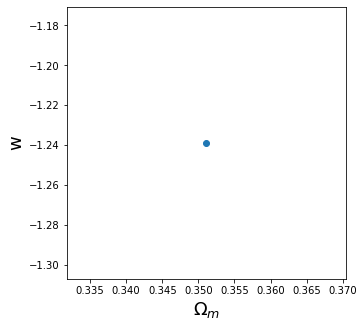

In [22]:
first_spot=df.iloc[2389]
fp=pd.DataFrame(first_spot)
fp=fp.T
fp

plt.rcParams["figure.figsize"] = (5,5)
a=fp[r'$\Omega_m$']
b=fp['w']


plt.plot(a,b, 'o')
plt.xlabel(r'$\Omega_m$', fontsize=18);
plt.ylabel('w', fontsize=18);

,$\Omega_m$,w,chi
count,10652.000000,10652.000000,10652.000000
mean,0.340824,-1.201541,1033.430415
std,0.022405,0.089614,0.644793
min,0.293746,-1.461624,1032.462242
25%,0.324284,-1.259712,1032.874019
50%,0.339122,-1.192181,1033.337000
75%,0.357021,-1.131912,1033.940680
max,0.396961,-1.035212,1034.761685


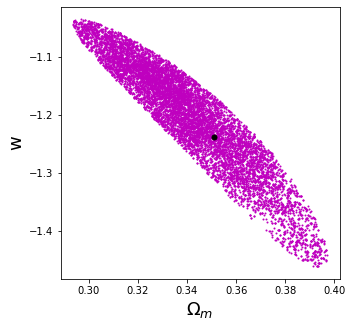

In [30]:

cwd=os.getcwd()
path_data=cwd+'/data/Supernova-chain-15000.txt'

data=np.genfromtxt(path_data)
da=pd.DataFrame(data)


da.columns=[ 'ones', 'zeros' ,r'$\Omega_m$', 'w', 'chi']
da=da.drop(['ones', 'zeros'], axis=1)
da=da.drop(index=[2389, 2390, 2391, 2392]  , axis=0)

subsample_1=da[da.chi-(1032.4620111882687)<2.3]
subsample_1.describe()

c=subsample_1[r'$\Omega_m$']
d=subsample_1['w']

plt.rcParams["figure.figsize"] = (5,5)

plt.plot(c,d, 'mo', markersize=1)
plt.plot(a,b, 'ko', markersize=5)
plt.xlabel(r'$\Omega_m$', fontsize=18);
plt.ylabel('w', fontsize=18);
subsample_1.describe()

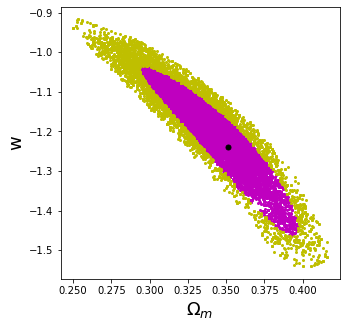

In [24]:
subsample_1=da[da.chi-(1032.4620111882687)<2.3]
other_than_subsample_1=da.drop(subsample_1.index)
db=other_than_subsample_1
subsample_2=da[(da.chi-(1032.4620111882687)<6.17) & (2.3<da.chi-(1032.4620111882687))]

e=subsample_2[r'$\Omega_m$']
f=subsample_2['w']


plt.rcParams["figure.figsize"] = (5,5)

plt.plot(c,d, 'mo', markersize=2)
plt.plot(e, f, 'yo', markersize=2)
plt.plot(a,b, 'ko', markersize=5)


plt.xlabel(r'$\Omega_m$', fontsize=18);
plt.ylabel('w', fontsize=18);

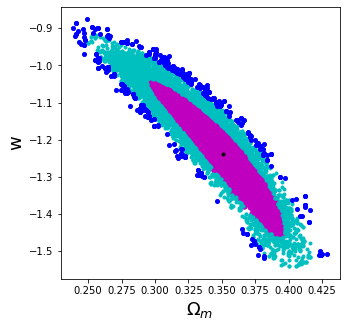

In [25]:
subsample_2=db[(db.chi-(1032.4620111882687)<6.17) & (2.3<db.chi-(1032.4620111882687))]
other_than_subsample_2=db.drop(subsample_2.index)
dc=other_than_subsample_2
subsample_3=dc[(dc.chi-(1032.4620111882687)<11.8) & (6.17<dc.chi-(1032.4620111882687))]



g=subsample_3[r'$\Omega_m$']
h=subsample_3['w']


plt.rcParams["figure.figsize"] = (5,5)


plt.plot(c,d, 'mo', markersize=5)
plt.plot(e, f, 'co', markersize=3)
plt.plot(g, h, 'bo', markersize=4)
plt.plot(a,b, 'ko', markersize=3)

plt.xlabel(r'$\Omega_m$', fontsize=18);
plt.ylabel('w', fontsize=18);

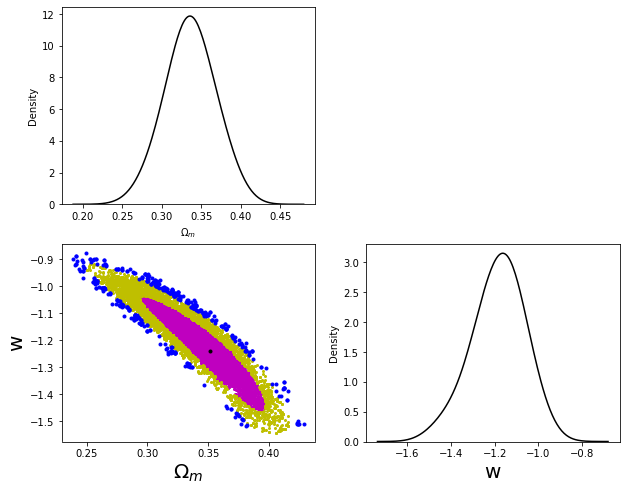

In [31]:


cwd=os.getcwd()
path_data=cwd+'/data/Supernova-chain-15000.txt'

data=np.genfromtxt(path_data)
dat=pd.DataFrame(data)
dat.columns=[ 'ones', 'zeros' ,r'$\Omega_m$', 'w', 'chi']
dat=dat.drop(['ones', 'zeros'], axis=1)



plt.rcParams["figure.figsize"] = (10, 8)

w=dat['w']
omega_m=dat[r'$\Omega_m$']


fig , axes= plt.subplots (nrows=2 , ncols=2)
axes[1,0].plot(c,d, 'mo', markersize=2)
axes[1,0].plot(e, f, 'yo', markersize=2)
axes[1,0].plot(g, h, 'bo', markersize=3)
axes[1,0].plot(a,b, 'ko', markersize=3)

axes[0,1].set_visible(False)


#axes[1,1].hist(w, bins = 100, color='c', density=True);
ax= sns.kdeplot(w, color='k', bw_adjust=4, ax=axes[1, 1]);


# axes[0,0].hist(omega_m, bins = 100, color='c');
ax1=sns.kdeplot(omega_m, color='k', bw_adjust=4, ax=axes[0,0] );



axes[1,1].set_xlabel('w', fontsize=20 );
axes[1,0].set_ylabel('w', fontsize=20);
axes[1,0].set_xlabel(r'$\Omega_m$', fontsize=20 );


plt.savefig('contours.eps', bbox_inches="tight", format='eps' )

In [10]:
from scipy import stats

#0.68 represents 68% confidence level (you can change it to 95.45% and 68.27% too or anything else)
#and n=2 represents the number of free parameters (that can be changed either)

a= stats.chi2.ppf(0.6827, 2)
b= stats.chi2.ppf(0.9545, 2)
c= stats.chi2.ppf(0.9973, 2)
a, b, c

(2.2958151607859736, 6.180085906050465, 11.82900701194368)